# Part A: Let's visualise some more!

## Exercise 1: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

###

In [9]:
import os
import pickle

# Define the relative path to the pickle file
relative_folder_path = "shared"
file_name = "performer_network.pkl"
file_path = os.path.join(relative_folder_path, file_name)

# Load the graph from the specified file path
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
else:
    print(f"File not found: {file_path}")


Number of nodes: 1939
Number of edges: 17578


100%|██████████| 2000/2000 [00:40<00:00, 49.50it/s]


BarnesHut Approximation  took  7.40  seconds
Repulsion forces  took  31.32  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.66  seconds


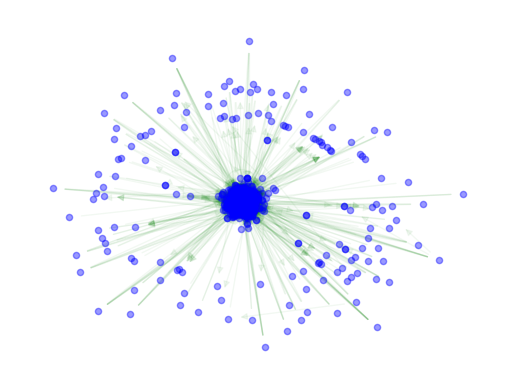

In [10]:
import networkx as nx
from fa2_modified import ForceAtlas2  # Ensure the correct module is used
import matplotlib.pyplot as plt

# Create a random geometric graph


# Initialize ForceAtlas2
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True, 
    linLogMode=False,  
    adjustSizes=False, 
    edgeWeightInfluence=1.0,

    # Performance options
    jitterTolerance=1.0,  
    barnesHutOptimize=True,  
    barnesHutTheta=1.2,  
    multiThreaded=False, 

    # Tuning options
    scalingRatio=2.0,  
    strongGravityMode=False,  
    gravity=1.0,  

    # Verbose logging
    verbose=True
)

# Run the ForceAtlas2 layout algorithm
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

# Visualize the graph
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)  # Removed 'with_labels'
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()
